<a href="https://colab.research.google.com/github/Bibhukalyan/ML-1/blob/main/ML_1_miniproject_q3_M22AI537.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
import cv2
import os
drive.mount('/content/drive')
image_path = "/content/drive/My Drive/cc_fraud_detect_project/ML_Assignment/charts/train_val/"
csv_path = "/content/drive/My Drive/cc_fraud_detect_project/ML_Assignment/charts/train_val.csv"
ifiles = os.listdir(image_path)
data = pd.read_csv(csv_path)
data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical
5,5,vbar_categorical
6,6,vbar_categorical
7,7,vbar_categorical
8,8,vbar_categorical
9,9,vbar_categorical


In [ ]:
sorted_files = []
image_data = []
index_data = []

for file in ifiles:
    l = np.int64(file[0:file.find(".png")])
    sorted_files.append(l)
    sorted_files.sort()
    
for file_index in sorted_files:
    img = cv2.imread(image_path+str(file_index)+".png",0)
    image_data.append(img)
    index_data.append(data['type'][file_index])
    

In [ ]:
image_data = np.array(image_data)
index_data = np.array(index_data)
image_data.shape

(1000, 128, 128)

In [ ]:
image_data = image_data.astype("float32") / 255.0
image_data

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

'dot_line'

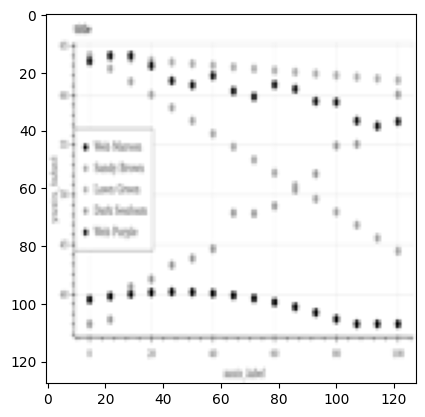

In [ ]:
plt.imshow(image_data[999],cmap="gray")
index_data[999]

In [ ]:
labels = data['type'].unique()
num_classes = len(labels)

c=0
dict={}
for l in labels:
    dict[l]=c
    c=c+1

dict

{'vbar_categorical': 0,
 'hbar_categorical': 1,
 'line': 2,
 'pie': 3,
 'dot_line': 4}

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(image_data, index_data, test_size=0.2,random_state=4)
x_train.shape, y_train.shape , x_test.shape, y_test.shape

((800, 128, 128), (800,), (200, 128, 128), (200,))

In [ ]:
y_train_numeric = np.array([dict[lbl] for lbl in y_train])
y_train_onehot = to_categorical(y_train_numeric,num_classes)
y_train_onehot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_onehot, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 7s 249ms/step - loss: 2.3114 - accuracy: 0.4187
Epoch 2/10
25/25 [==============================] - 8s 339ms/step - loss: 0.5808 - accuracy: 0.8175
Epoch 3/10
25/25 [==============================] - 6s 255ms/step - loss: 0.2706 - accuracy: 0.9325
Epoch 4/10
25/25 [==============================] - 8s 339ms/step - loss: 0.1801 - accuracy: 0.9750
Epoch 5/10
25/25 [==============================] - 6s 258ms/step - loss: 0.1336 - accuracy: 0.9875
Epoch 6/10
25/25 [==============================] - 10s 405ms/step - loss: 0.1037 - accuracy: 0.9862
Epoch 7/10
25/25 [==============================] - 6s 254ms/step - loss: 0.0816 - accuracy: 0.9912
Epoch 8/10
25/25 [==============================] - 8s 343ms/step - loss: 0.0653 - accuracy: 0.9925
Epoch 9/10
25/25 [==============================] - 8s 307ms/step - loss: 0.0563 - accuracy: 0.9987
Epoch 10/10
25/25 [==============================] - 8s 342ms/step - loss: 0.0501 - accuracy: 0.995

In [ ]:
y_test_numeric = np.array([dict[lbl] for lbl in y_test])
y_test_onehot = to_categorical(y_test_numeric,num_classes)
y_test_onehot

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_onehot)

4/4 [==============================] - 0s 83ms/step - loss: 0.2052 - accuracy: 0.9153


2 layer CNN

In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_2.fit(x_train, y_train_onehot, epochs=10, batch_size=32)

Epoch 1/10
15/15 [==============================] - 13s 753ms/step - loss: 1.6288 - accuracy: 0.3547
Epoch 2/10
15/15 [==============================] - 11s 753ms/step - loss: 0.7906 - accuracy: 0.6902
Epoch 3/10
15/15 [==============================] - 10s 676ms/step - loss: 0.3279 - accuracy: 0.8868
Epoch 4/10
15/15 [==============================] - 10s 636ms/step - loss: 0.1373 - accuracy: 0.9637
Epoch 5/10
15/15 [==============================] - 11s 751ms/step - loss: 0.1054 - accuracy: 0.9744
Epoch 6/10
15/15 [==============================] - 12s 830ms/step - loss: 0.0494 - accuracy: 0.9872
Epoch 7/10
15/15 [==============================] - 10s 667ms/step - loss: 0.0250 - accuracy: 0.9979
Epoch 8/10
15/15 [==============================] - 10s 661ms/step - loss: 0.0169 - accuracy: 0.9979
Epoch 9/10
15/15 [==============================] - 11s 752ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 10/10
15/15 [==============================] - 11s 762ms/step - loss: 0.0057 - accura